<a href="https://colab.research.google.com/github/Farahnosh-Yousofi/PyTorch-Tutorials/blob/main/Pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [24]:
# Setup Device-agnostis code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

x = torch.arange(start, end, step).unsqueeze(dim = 1)

y = weight*x+bias


In [26]:
y, x, len(x), len(y)

(tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270],
         [0.9300],
         [0.9330],
         [0.9360],
         [0.9390],
         [0.9420],
         [0.9450],
         [0.9480],
         [0.9510],
         [0.9540],
         [0.9570],
         [0.9600],
         [0.9630],
         [0.9660],
         [0.9690],
         [0.9720],
         [0.9750],
         [0.9780],
         [0.9810],
         [0.9840],
         [0.9870],
         [0.9900],
         [0.9930],
         [0.9960],
         [0.9990],
         [1.0020],
         [1.0050],
         [1.0080],
         [1.0110],
         [1.0140],
         [1.0170],
         [1.0200],
         [1.0230],
         [1.0260],
         [1.0290],
         [1.0320],
         [1.0350],
         [1.0380],
         [1.0410],
         [1.0440],
         [1.0470],
         [1.0500],
         [1.0530],
         [1.

In [28]:
split = int(0.8*len(x))
split

80

In [29]:
x_train, y_train = x[:split], y[:split]

In [30]:
x_test, y_test = x[split:], y[split:]

In [31]:
x_train, y_train, x_test, y_test

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.

In [32]:
def plot_data(train_data =x_train,
                 train_label = y_train,
                 test_data = x_test,
                 test_labels = y_test,
                 predictions = None):

  '''
  Plots training data and test data and compares pridections
  '''
  plt.figure(figsize = (10,7))

  #plotting training data
  plt.scatter(train_data, train_label, c="g", s = 4, label = "Training Data")

  # plotting testing data
  plt.scatter(test_data, test_labels, c = "orange", s = 4 , label = "Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "red", s = 4, label = "Predictions for test data")

  # show the legend
  plt.legend(prop={"size":14})


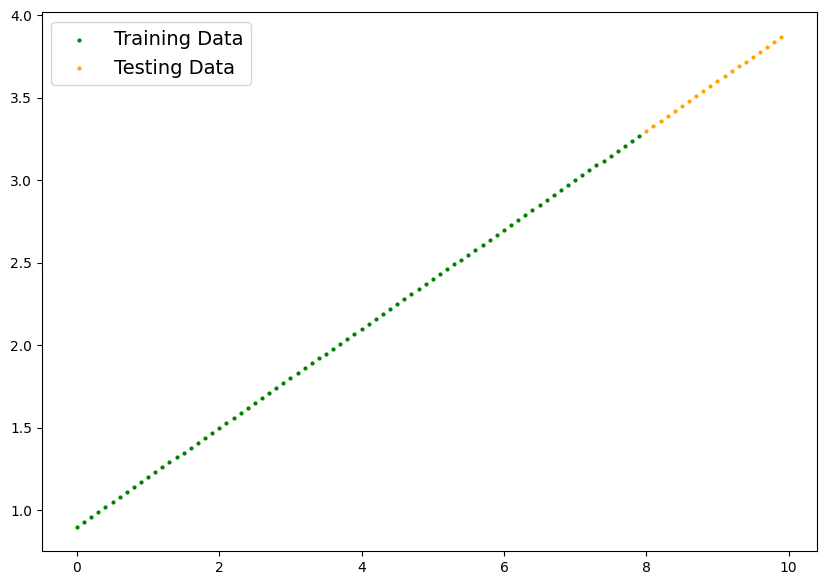

In [ ]:
plot_data()

# Build a PyTorch Model by subclassing nn.Module
## 1. Inside should be a randomly initialized nn.Parameter() with requires_grad = True, one for weight and one for bias
## 2. implement the forward() method to compute the linear regression function you used to create the dataset in 1
## 3. Once you've constructed the model, make an instance of it and check its state_dict()
## 4. Note: if you'd like to use nn.Linear() instead of  nn.Parameter() you can.

def __init__(self):
This defines the constructor (__init__ method) of a class.
The __init__ method is automatically called when an instance (object) of the class is created.
The parameter self refers to the instance of the class being initialized.


super().__init__()
The super() function calls the constructor (__init__ method) of the parent (super) class.
This is useful when the class inherits from another class (i.e., it is a subclass).
It ensures that the parent class's initialization logic is executed before adding any new behavior in the subclass. "It is important to have this because we are using the parent class of nn.module"


self: Refers to the instance of the class.
x: torch.Tensor: This specifies that x is expected to be a PyTorch tensor.
-> torch.Tensor: This is a type hint indicating that the method is expected to return a PyTorch tensor.


In [42]:


class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,# <- start with random weights (this will get adjusted as the model learns)
    dtype=torch.float), # <- Pytorch works with float32 by default
                                requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                    requires_grad = True) # <- Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
  # forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data(e.g. training / testing features)
    return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)




In [ ]:
## Option 2
class LinearRegressionModel(nn.module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



#Instantiate the model and put it to the target device


In [43]:
torch.manual_seed(42)
my_model = LinearRegressionModel()
my_model = my_model.to(device)

my_model, my_model.state_dict()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(my_model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

#Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
Write a training loop to perform the appropriate training steps for 300 epochs.
The training loop should test the model on the test dataset every 20 epochs.


	What does it do?
Loss function	Measures how wrong your model's predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.

Optimizer	Tells your model how to update its internal parameters to best lower the loss.

In [44]:
# Create the loss function and optimizer
# Linear model so MAE Loss is used
loss_fn = nn.L1Loss()


#Create optimizer torch.optim.SGD(params, lr)
optimizer = torch.optim.SGD(params = my_model.parameters(), # Parameters of target model to optimize
                            lr = 0.01) # learning rate (how much the optimizer should change parameters at each step, higher = more (less stable), lower = less (might take a long time))

In [46]:
# Setup empty lists to keep track of model progress
epoch_count = []
train_loss_values = []
test_loss_values = []

# Training loop


# Train model for 300 epochs
epochs = 300

# Send data to target device
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  my_model.train()

  # 1. Forward pass
  y_predict = my_model(x_train)

  # 2. Calculate loss
  loss = loss_fn(y_predict, y_train)


  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()


  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    my_model.eval()
    with torch.inference_mode():

      # 1. Forward pass
      test_pred = my_model(x_test)
      # 2. Calculate test loss
      test_loss = loss_fn(test_pred, y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")
      # Print out what's happening

      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())


Epoch: 0 | Train loss: 0.745 | Test loss: 0.711
Epoch: 0 | MAE Train Loss: 0.745137631893158 | MAE Test Loss: 0.7112821340560913 
Epoch: 20 | Train loss: 0.514 | Test loss: 0.441
Epoch: 20 | MAE Train Loss: 0.5139325857162476 | MAE Test Loss: 0.4405772089958191 
Epoch: 40 | Train loss: 0.283 | Test loss: 0.170
Epoch: 40 | MAE Train Loss: 0.28272780776023865 | MAE Test Loss: 0.16987238824367523 
Epoch: 60 | Train loss: 0.072 | Test loss: 0.079
Epoch: 60 | MAE Train Loss: 0.07243101298809052 | MAE Test Loss: 0.07932551205158234 
Epoch: 80 | Train loss: 0.052 | Test loss: 0.116
Epoch: 80 | MAE Train Loss: 0.05217992514371872 | MAE Test Loss: 0.11574526876211166 
Epoch: 100 | Train loss: 0.045 | Test loss: 0.104
Epoch: 100 | MAE Train Loss: 0.04520002752542496 | MAE Test Loss: 0.10391416400671005 
Epoch: 120 | Train loss: 0.038 | Test loss: 0.089
Epoch: 120 | MAE Train Loss: 0.03834597021341324 | MAE Test Loss: 0.08861879259347916 
Epoch: 140 | Train loss: 0.031 | Test loss: 0.073
Epoch: 1

#4. Make predictions with the trained model on the test data.

Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [64]:
# Make predictions with the model
my_model.eval()
with torch.inference_mode():
  test_predcition = my_model(x_test)
test_predcition

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1544],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1756],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1877],
        [1.1908]])

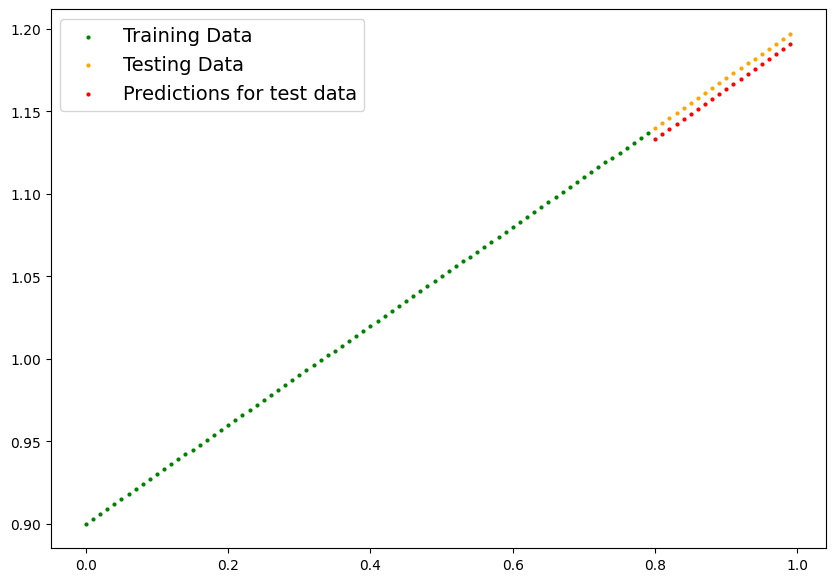

In [48]:
plot_data(x_train,y_train, x_test, y_test, test_predcition)

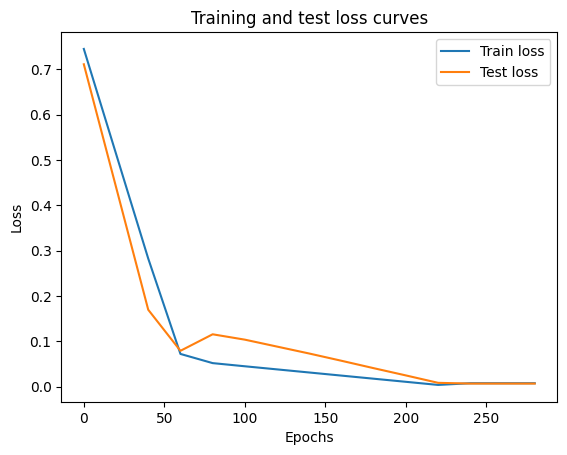

In [47]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [50]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(my_model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3027])), ('bias', tensor([0.8911]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


#5. Save your trained model's state_dict() to file.

Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [54]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_my_model_Exercises.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj =  my_model.state_dict(), # only saving the state_dict() onlu saves the models learned parameters
           f = MODEL_SAVE_PATH)

Saving model to :models/01_pytorch_workflow_my_model_Exercises.pth


In [55]:
ls -l models/01_pytorch_workflow_my_model_Exercises.pth

-rw-r--r-- 1 root root 1810 Mar 11 15:33 models/01_pytorch_workflow_my_model_Exercises.pth


# Updated Code to Save Model to Google Drive


In [57]:

from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Create a directory in Google Drive for models
MODEL_PATH = Path("/content/drive/MyDrive/models")  # Saves inside your Google Drive
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 3. Define model file name
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 4. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=my_model.state_dict(),  # Saving only the model's learned parameters
           f=MODEL_SAVE_PATH)

print(f"Model saved successfully at: {MODEL_SAVE_PATH}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saving model to: /content/drive/MyDrive/models/01_pytorch_workflow_model_0.pth
Model saved successfully at: /content/drive/MyDrive/models/01_pytorch_workflow_model_0.pth


#How to Load the Model from Google Drive?
If you want to reload the model in another session:

In [59]:
# Mount Google Drive
drive.mount('/content/drive')

# Load model from Google Drive
MODEL_LOAD_PATH = "/content/drive/MyDrive/models/01_pytorch_workflow_model_0.pth"
my_model.load_state_dict(torch.load(MODEL_LOAD_PATH))

print("Model loaded successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model loaded successfully!


<ipython-input-59-e10882be8c48>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  my_model.load_state_dict(torch.load(MODEL_LOAD_PATH))


In [60]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)


loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f = MODEL_LOAD_PATH))

<ipython-input-60-ba9ed308d7fc>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f = MODEL_LOAD_PATH))


<All keys matched successfully>

In [61]:
loaded_model.to(device)

LinearRegressionModel()

In [66]:
y_predict_new = loaded_model(x_test)
test_predcition == y_predict_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])